# HANDLING WITH MISSING VALUES

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [3]:
df = df0.copy()

In [4]:
df.head()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58


In [5]:
df.sample(5)

,id,gender,status,dept,var1,var2,salary
3,P004,F,FT,AWS,nan,8.0,120
7,P008,F,-,FS,10,2.0,136
5,P006,F,PT,None,1,NaN,75
2,P003,M,-,AWS,5,5.0,59
9,P010,F,FT,DS,-,7.0,125


In [6]:
df.groupby('status',dropna=False).mean(numeric_only=True)

,var2
status,
-,3.500000
FT,7.666667
PT,7.000000
NaN,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [8]:
df.groupby('status').value_counts(dropna=False)

status  id    gender  dept  var1  var2  salary
-       P003  M       AWS   5     5.0   59.0      1
        P008  F       FS    10    2.0   136.0     1
FT      P001  M       DS    2     8.0   NaN       1
        P004  F       AWS   nan   8.0   120.0     1
        P007  M       FS    nan   NaN   NaN       1
        P010  F       DS    -     7.0   125.0     1
PT      P002  F       FS    3     NaN   54.0      1
        P005  M       DS    7     11.0  58.0      1
        P006  F       NaN   1     NaN   75.0      1
        P009  M       NaN   14    3.0   60.0      1
dtype: int64

In [9]:
df.groupby('status').value_counts()

status  id    gender  dept  var1  var2  salary
-       P003  M       AWS   5     5.0   59        1
        P008  F       FS    10    2.0   136       1
FT      P004  F       AWS   nan   8.0   120       1
        P010  F       DS    -     7.0   125       1
PT      P005  M       DS    7     11.0  58        1
dtype: int64

In [10]:
df.status.value_counts(dropna=False)

FT     4
PT     4
-      2
NaN    1
Name: status, dtype: int64

In [11]:
df


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [12]:
type(df.status[2])

str

In [13]:
type(df.status[1])

str

In [14]:
type(df.var1[3])

str

In [15]:
type(np.nan)

float

In [16]:
type(df.var2[1])

numpy.float64

In [17]:
type(df.salary[6])

NoneType

In [18]:
type(df.salary[0])

float

In [19]:
a = np.nan
b = np.NaN

print(np.isnan(a))
print(np.isnan(b))

True
True


In [20]:
type(None)

NoneType

In [21]:
print(0 * np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)
print(np.nan == np.nan)
print(10 > np.nan)
print(np.inf > np.nan)
print(np.nan is np.nan)
print(0.3 == 3 * 0.1)

nan
nan
nan
nan
nan
False
False
False
True
False


In [22]:
df.salary

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [23]:
type(df.salary[0])

float

In [24]:
type(df.salary[6])

NoneType

In [25]:
type(df.salary[1])

int

# Detecting missing values

In [26]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [27]:
df.isnull()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [28]:
df.notnull()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [29]:
df.isnull().any()

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [30]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [31]:
round(df.isnull().sum()/len(df)*100,2)

id         0.00
gender     0.00
status     9.09
dept      18.18
var1       0.00
var2      27.27
salary    27.27
dtype: float64

In [32]:
df[~df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [33]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [34]:
df.loc[df['salary'].isnull()]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,None
10,P011,M,NaN,AWS,6,9.0,NaN


In [35]:
df[df.dept.isnull()]

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


In [36]:
df.loc[df.dept.isnull()]

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


In [37]:
df.loc[df.dept == 'FS']

,id,gender,status,dept,var1,var2,salary
1,P002,F,PT,FS,3,NaN,54
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136


In [38]:
df[df['dept'] == 'FS']

,id,gender,status,dept,var1,var2,salary
1,P002,F,PT,FS,3,NaN,54
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136


In [39]:
df.loc[df.dept.isnull(),['salary','dept']]

,salary,dept
5,75,None
8,60,NaN


# Converting Inappropriate values to NaN values
- map()
- replace()

In [40]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [41]:
df['var1'].map({"-" : np.nan})  # not an appropriate method

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

In [42]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [43]:
df.var1.replace('-',np.NaN)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [44]:
type(df.var1[6])

str

In [45]:
type(df.var1[9])

str

In [46]:
df.var1.replace('-',np.NaN,inplace=True)

In [47]:
df.var1 = df.var1.astype('float')

In [48]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,-,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,-,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [49]:
df.var1

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [50]:
df['status'] = df['status'].replace('-',np.nan)
df['status']

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [51]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [52]:
df['gender'].map({'M':0,'F':1})

0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
Name: gender, dtype: int64

In [53]:
df.isnull().sum()

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

In [54]:
df0.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

# Missing value handling methods
1. Deleting (Dropping) rows
2. Replacing (filling) with mean-median-mode (imputation)
3. Assigning an unique category
4. Predicting the missing values
5. Using Algorithms which support missing values
## 1-  Dropping
- dropna()
- drop()

In [55]:
help(df.dropna)

Help on method dropna in module pandas.core.frame:

dropna(*, axis: 'Axis' = 0, how: 'str | NoDefault' = <no_default>, thresh: 'int | NoDefault' = <no_default>, subset: 'IndexLabel' = None, inplace: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed fr

In [56]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [57]:
df.dropna(axis = 0, how = 'any', inplace=False)

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [58]:
df.dropna(axis = 1, how = 'any', inplace=False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [59]:
df.dropna(axis = 1, how = 'all', inplace=False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [60]:
df['delete_me'] = np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [61]:
df.dropna(axis = 1, how = 'all', inplace=False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [62]:
df.dropna(axis = 1, how = 'all', inplace=True)

In [63]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [64]:
df.dropna(axis = 1, thresh=9, inplace=False)

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [65]:
df.drop([1,3,5])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [66]:
df.drop(['var1','var1'],axis=1)

,id,gender,status,dept,var2,salary
0,P001,M,FT,DS,8.0,NaN
1,P002,F,PT,FS,NaN,54
2,P003,M,NaN,AWS,5.0,59
3,P004,F,FT,AWS,8.0,120
4,P005,M,PT,DS,11.0,58
5,P006,F,PT,None,NaN,75
6,P007,M,FT,FS,NaN,None
7,P008,F,NaN,FS,2.0,136
8,P009,M,PT,NaN,3.0,60
9,P010,F,FT,DS,7.0,125


## 2 - Filling Missing Values (Imputation)
1. fillna()
2. where()
3. interpolate()

In [67]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [68]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [69]:
df['var1'].fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

In [70]:
df['var1'].mean()

6.0

In [71]:
df['var1'].fillna(df['var1'].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [72]:
df.mean(numeric_only=True)

var1    6.000
var2    6.625
dtype: float64

In [73]:
df.fillna(df.mean(numeric_only=True))

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,None,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,None
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [74]:
df.fillna({'dept':'other','var1':df.var1.mean(),'var2':df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


In [75]:
df.mean(numeric_only=True)[['var1','var2']]

var1    6.000
var2    6.625
dtype: float64

In [76]:
df.fillna(df.mean(numeric_only=True)[['var1','var2']])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,None,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,None
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [77]:
df.where(cond = df.notna(),other = df.mean(numeric_only=True),axis=1)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,NaN
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [78]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [79]:
df.salary = df.salary.astype('float')
df.salary

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [80]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [81]:
df.interpolate()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,8.0,75.0
6,P007,M,FT,FS,5.5,5.0,105.5
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


In [82]:
df.dept

0       DS
1       FS
2      AWS
3      AWS
4       DS
5     None
6       FS
7       FS
8      NaN
9       DS
10     AWS
Name: dept, dtype: object

In [83]:
df_grp = df.copy()


In [84]:
df.dept.fillna(method='ffill',inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [85]:
df.loc[df['salary']>100, ['status','salary'] ]

,status,salary
3,FT,120.0
7,NaN,136.0
9,FT,125.0


In [86]:
df.loc[df['salary']<100, ['status','salary'] ]

,status,salary
1,PT,54.0
2,NaN,59.0
4,PT,58.0
5,PT,75.0
8,PT,60.0


In [87]:
# inplace=True didnt work

df.loc[df['salary'] >= 100, 'status'].fillna(df.loc[df['salary'] >= 100, 'status'].mode()[0],inplace=True)
df.loc[df['salary'] < 100, 'status'].fillna(df.loc[df['salary'] < 100, 'status'].mode()[0],inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [88]:
df.loc[df['salary'] >= 100, 'status'] = df.loc[df['salary'] >= 100, 'status'].fillna(df.loc[df['salary'] >= 100, 'status'].mode()[0])
df.loc[df['salary'] < 100, 'status'] = df.loc[df['salary'] < 100, 'status'].fillna(df.loc[df['salary'] < 100, 'status'].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


### Let's fill the last missing value at 'status' column with the mode of the group of 'gender' and 'dept'.

In [89]:
df_grp

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [90]:
df_grp.groupby('status', dropna=False).salary.agg(['mean',min,max])

,mean,min,max
status,,,
FT,122.50,120.0,125.0
PT,61.75,54.0,75.0
NaN,97.50,59.0,136.0


In [91]:
df_grp['status'].isnull()

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10     True
Name: status, dtype: bool

In [92]:
df_grp[df_grp['status'].isnull()]

,id,gender,status,dept,var1,var2,salary
2,P003,M,NaN,AWS,5.0,5.0,59.0
7,P008,F,NaN,FS,10.0,2.0,136.0
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [93]:
df_grp[df_grp['status'].isnull()][['status']]

,status
2,NaN
7,NaN
10,NaN


In [94]:
df_grp.loc[2,'status']= 'PT'

df_grp.loc[7,'status'] = 'FT'

In [95]:
df_grp

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,None,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [96]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [97]:
df.groupby(['gender','dept'])['status'].apply(lambda x:x.mode()[0])

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [98]:
df['trans_status'] = df.groupby(['gender','dept'])['status'].transform(lambda x:x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,FT
2,P003,M,PT,AWS,5.0,5.0,59.0,PT
3,P004,F,FT,AWS,NaN,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,FT
5,P006,F,PT,DS,1.0,NaN,75.0,FT
6,P007,M,FT,FS,NaN,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,FT
8,P009,M,PT,FS,14.0,3.0,60.0,FT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


In [99]:
df['status'].fillna(df['trans_status'],inplace=True)



In [100]:
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54.0,FT
2,P003,M,PT,AWS,5.0,5.0,59.0,PT
3,P004,F,FT,AWS,NaN,8.0,120.0,FT
4,P005,M,PT,DS,7.0,11.0,58.0,FT
5,P006,F,PT,DS,1.0,NaN,75.0,FT
6,P007,M,FT,FS,NaN,NaN,NaN,FT
7,P008,F,FT,FS,10.0,2.0,136.0,FT
8,P009,M,PT,FS,14.0,3.0,60.0,FT
9,P010,F,FT,DS,NaN,7.0,125.0,FT


### Lets fill the missing values at 'salary' column with the mean of the group of 'status' and 'dept'

In [101]:
df.groupby('dept')['salary'].mean()

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [102]:
df.groupby(['status','dept'])['salary'].mean()

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [103]:
df.groupby(['status','dept'])['salary'].transform('mean')

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [104]:
df['trans_salary'] = df.groupby(['status','dept'])['salary'].transform('mean')
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,NaN,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


In [105]:
df['salary'].fillna(df['trans_salary'],inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


### Let's fill the missing values at 'var1' column with the mean of the group of 'gender' and 'status'

In [106]:
df.groupby(['gender','status'])[['var1']].mean()

var1
gender status      
F      FT      10.0
       PT       2.0
M      FT       2.0
       PT       8.0

In [120]:
trans_var1 = df.groupby(['gender','status'])['var1'].transform('mean')
trans_var1

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [121]:
df['var1'].fillna(df.groupby(['gender','status'])[['var1']].transform('mean'),inplace=True)
df

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrame"

In [122]:
df['var2']

0      8.0
1      NaN
2      5.0
3      8.0
4     11.0
5      NaN
6      NaN
7      2.0
8      3.0
9      7.0
10     9.0
Name: var2, dtype: float64

In [123]:
df.groupby(['status'])['var2'].mean()

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [124]:
trans_var2 = df.groupby(['status'])['var2'].transform('mean')
trans_var2

0     6.25
1     7.00
2     7.00
3     6.25
4     7.00
5     7.00
6     6.25
7     6.25
8     7.00
9     6.25
10    7.00
Name: var2, dtype: float64

In [125]:
df['var2'].fillna(trans_var2, inplace=True)

In [126]:
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.00,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5
6,P007,M,FT,FS,NaN,6.25,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.00,125.0,FT,125.0


### Filling with Interpolation

In [129]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [130]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [131]:
ser = pd.Series(np.random.rand(10))
ser

0    0.500206
1    0.829840
2    0.575233
3    0.380920
4    0.114181
5    0.624230
6    0.339410
7    0.105387
8    0.557124
9    0.843735
dtype: float64

<Axes: >

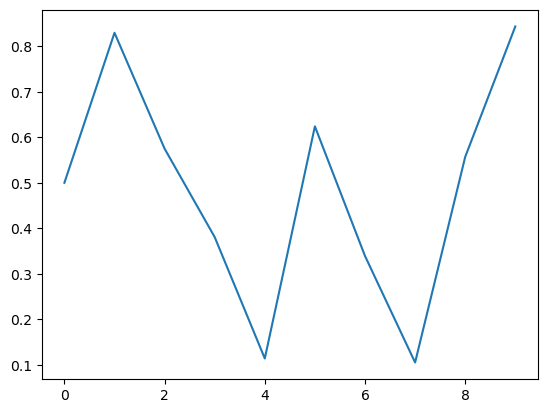

In [132]:
ser.plot()

<Axes: >

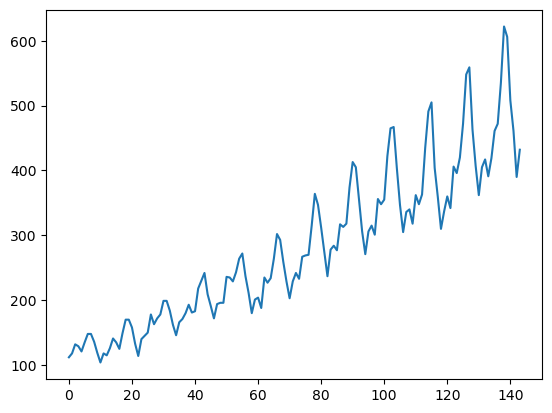

In [133]:
flights.passengers.plot()

In [135]:
flight_copy = flights.copy()

In [136]:
flight_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [138]:
flight_copy.loc[np.random.randint(1,144,20)   , ['passengers']] = np.nan

In [139]:
flight_copy.sample(20)

,year,month,passengers
42,1952,Jul,230.0
112,1958,May,363.0
102,1957,Jul,465.0
67,1954,Aug,293.0
107,1957,Dec,336.0
77,1955,Jun,NaN
87,1956,Apr,313.0
38,1952,Mar,193.0
20,1950,Sep,158.0
79,1955,Aug,347.0


<Axes: >

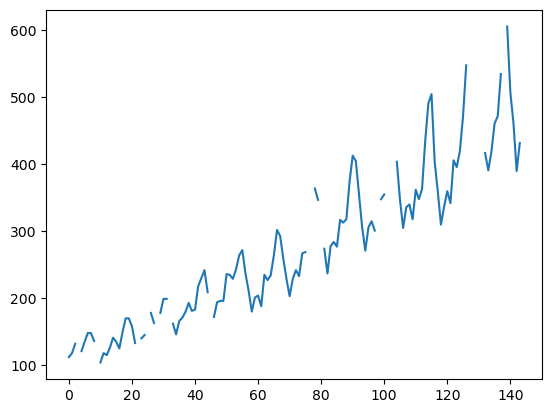

In [141]:
flight_copy.passengers.plot()

<Axes: >

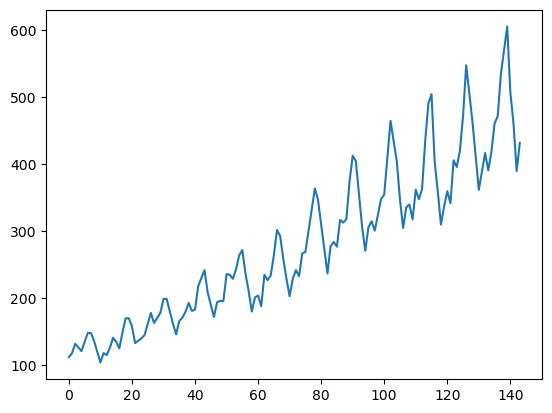

In [142]:
flight_copy['passengers'].interpolate().plot()

<Axes: >

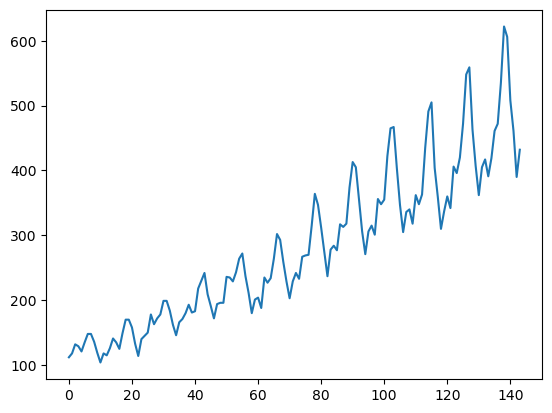

In [143]:
flights.passengers.plot()

<Axes: >

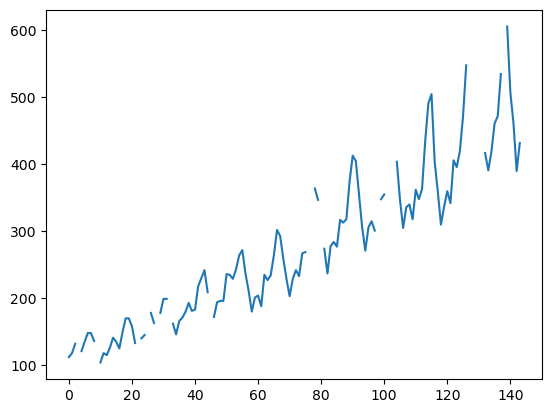

In [144]:
flight_copy.passengers.plot()

<Axes: >

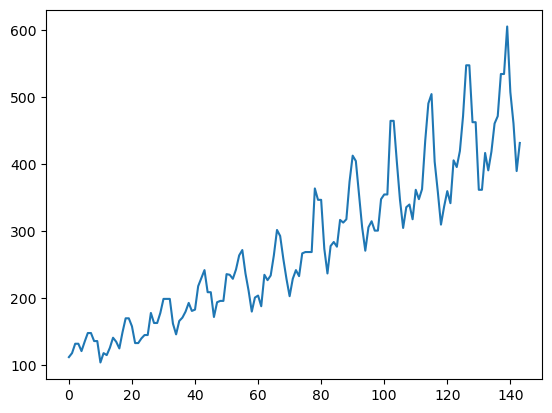

In [147]:
flight_copy.passengers.fillna(method='ffill').plot()